import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
##Loading Cifar-10 datset
def load():
  dataset=tf.keras.datasets.cifar10.load_data()
  return dataset

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
df=load()

In [5]:
(X_train,Y_train),(X_test,Y_test)=load()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
def plot_img(image):
  plt.imshow(image)
  plt.show()

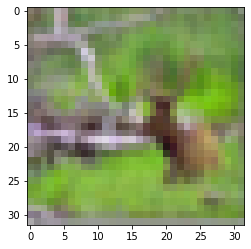

In [9]:
plot_img(X_train[669])

In [10]:
Y_train.shape

(50000, 1)

In [11]:
##One-Hot encoding
Y_train=np.array(pd.get_dummies(Y_train.reshape(50000)))
Y_test=np.array(pd.get_dummies(Y_test.reshape(10000)))
Y_train.shape,Y_test.shape

((50000, 10), (10000, 10))

In [12]:
##additonal data for test runs
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    validation_split=0.2,
    zoom_range=0.2)
datagen.fit(X_train)

In [13]:
## Model based on LeNet-5
from keras import Sequential
from keras.layers import Flatten,Input,Dense,Dropout,MaxPooling2D,Conv2D,BatchNormalization
from tensorflow.keras.optimizers import SGD
import keras
def leNet():
  model = Sequential()
  model.add(BatchNormalization())
  model.add(Conv2D(32, 3, activation='relu', input_shape=(32,32,3),padding='same') )
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same') )
  model.add(BatchNormalization())
  model.add(Conv2D(64, 3, activation='relu',kernel_regularizer = None) )
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same') )
  model.add(BatchNormalization())
  model.add(Conv2D(128, 3, activation='relu', input_shape=(32,32,3),padding='same') )
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same') )
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=64,activation='relu'))
  model.add(Dense(units=10, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)  
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model

In [14]:
model=leNet()


C:\Users\rajde\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [17]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=100), epochs= 50,validation_data = (X_test,Y_test), validation_batch_size=len(Y_test))

Epoch 1/50
500/500 [==============================] - 26s 52ms/step - loss: 0.7582 - accuracy: 0.7431 - val_loss: 0.6407 - val_accuracy: 0.7813
Epoch 2/50
500/500 [==============================] - 23s 46ms/step - loss: 0.7500 - accuracy: 0.7474 - val_loss: 0.6046 - val_accuracy: 0.7992
Epoch 3/50
500/500 [==============================] - 23s 45ms/step - loss: 0.7485 - accuracy: 0.7480 - val_loss: 0.5821 - val_accuracy: 0.8050
Epoch 4/50
500/500 [==============================] - 23s 46ms/step - loss: 0.7496 - accuracy: 0.7514 - val_loss: 0.6266 - val_accuracy: 0.7890
Epoch 5/50
500/500 [==============================] - 23s 47ms/step - loss: 0.7432 - accuracy: 0.7506 - val_loss: 0.6494 - val_accuracy: 0.7858
Epoch 6/50
500/500 [==============================] - 23s 46ms/step - loss: 0.7419 - accuracy: 0.7498 - val_loss: 0.5810 - val_accuracy: 0.8055
Epoch 7/50
500/500 [==============================] - 23s 45ms/step - loss: 0.7396 - accuracy: 0.7533 - val_loss: 0.5965 - val_accuracy:

In [18]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5352 - accuracy: 0.8228


[0.5352293848991394, 0.8227999806404114]

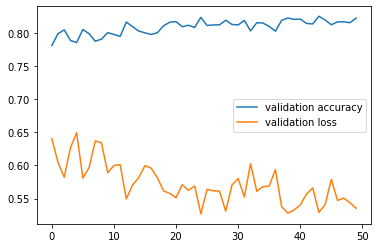

In [19]:
##plotting graph val_accuracy Vs val_loss
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.legend(['validation accuracy','validation loss'])
plt.show()

In [47]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets
